In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
folder = 'Bharatanatyam'
file = 'Bharatanatyam.csv'

In [0]:
folder = 'Kathak'
file = 'Kathak.csv'

In [0]:
folder = 'Kuchipudi'
file = 'Kuchipudi.csv'

In [0]:
folder = 'Odissi'
file = 'Odissi.csv'

In [0]:
folder = 'Kathakali'
file = 'Kathakali.csv'

In [0]:
folder = 'Sattriya'
file = 'Sattriya.csv'

In [0]:
folder = 'Manipuri'
file = 'Manipuri.csv'

In [0]:
folder = 'Mohiniyattam'
file = 'Mohiniyattam.csv'

In [0]:
path = Path(base_dir + 'data/indian_classical_dance')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
classes = ['Bharatanatyam','Kathak','Kuchipudi','Odissi','Kathakali','Sattriya','Manipuri','Mohiniyattam']

**Delete the corrupt files**

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [33]:
data.classes

['Bharatanatyam',
 'Kathak',
 'Kathakali',
 'Kuchipudi',
 'Manipuri',
 'Mohiniyattam',
 'Odissi',
 'Sattriya']

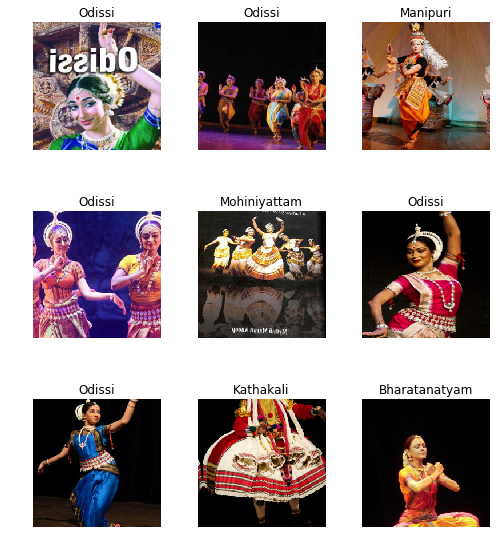

In [34]:
data.show_batch(rows=3, figsize=(7,8))

In [35]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Bharatanatyam',
  'Kathak',
  'Kathakali',
  'Kuchipudi',
  'Manipuri',
  'Mohiniyattam',
  'Odissi',
  'Sattriya'],
 8,
 568,
 141)

**Create a cnn**

In [36]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 81990020.21it/s]


**Train the Model**

In [45]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.766209,1.072006,0.368794,00:12
1,0.561446,1.113292,0.333333,00:12
2,0.455843,1.290029,0.361702,00:12
3,0.360335,1.160162,0.333333,00:12
4,0.298457,0.982527,0.326241,00:12


In [0]:
learn.save('stage-1')

**Refine the model**

In [0]:
learn.unfreeze()

In [55]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


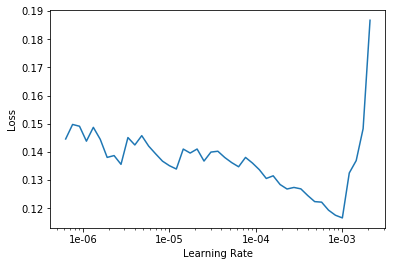

In [56]:
learn.recorder.plot()

In [59]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.145454,0.908098,0.290780,00:12
1,0.145309,0.881618,0.304965,00:12
2,0.141861,0.857546,0.283688,00:12
3,0.138607,0.847849,0.290780,00:13


In [0]:
learn.save('stage-2')

In [81]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/gdrive/My Drive/fastai-v3/data/indian_classical_dance;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/gdrive/My Drive/fastai-v3/data/indian_classical_dance;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNo

In [82]:
interp = ClassificationInterpretation.from_learner(learn)

IndexError: ignored

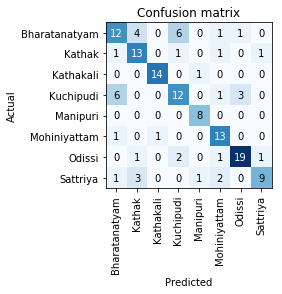

In [73]:
interp.plot_confusion_matrix()

In [74]:
interp.most_confused(min_val=2)

[('Bharatanatyam', 'Kuchipudi', 6),
 ('Kuchipudi', 'Bharatanatyam', 6),
 ('Bharatanatyam', 'Kathak', 4),
 ('Kuchipudi', 'Odissi', 3),
 ('Sattriya', 'Kathak', 3),
 ('Odissi', 'Kuchipudi', 2),
 ('Sattriya', 'Mohiniyattam', 2)]

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

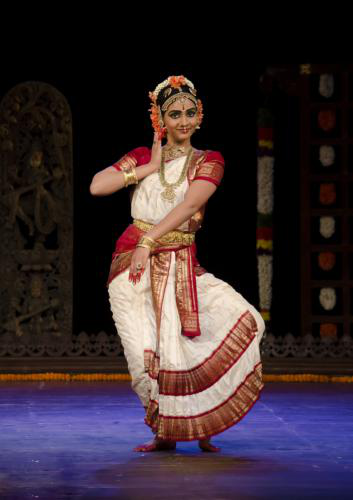

In [77]:
img = open_image(path/'Kuchipudi'/'00000002.jpg')
img

In [78]:
learn = load_learner(path)

AttributeError: ignored

In [69]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Mohiniyattam